# ***Exe.1:***

In [1]:
!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P ./data/

--2022-12-01 18:16:52--  https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/aamg1apjhclecka/regression_generated.csv [following]
--2022-12-01 18:16:52--  https://www.dropbox.com/s/raw/aamg1apjhclecka/regression_generated.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf23be778800c55aeb367fdf43a.dl.dropboxusercontent.com/cd/0/inline/Bx21aMQfIOgHfaYtxpuS151omnyMWOliGNar__fNQUkpJDsmugedZFlszMzON5I0RjvAibA6b-FtIuJJWdXiQTieIJZnknSpeOBTO4pBIhiLg8eIcV_hIdhCkeU6uDbrCdeBUmzihA76ZvfkcEW8K_4eZq3RnrHBnLB5rivAqmKKIA/file# [following]
--2022-12-01 18:16:52--  https://ucf23be778800c55aeb367fdf43a.dl.dropboxusercontent.com/cd/0/inline/Bx21aMQfIOgHfaYtxpuS151omnyMWOliGNar__fNQUkp

In [2]:
import pandas as pd

df = pd.read_csv('./data/regression_generated.csv')

print(df) 


           label  features_1  features_2  features_3  features_4  features_5  \
0     -89.243497    2.175170   -0.285786   -0.603396   -0.627453   -0.686474   
1     230.050125    1.481941   -1.327870   -0.543583   -0.303578    1.552964   
2    -286.844411   -1.154394   -0.178649   -1.636646    0.239353   -0.684994   
3     364.552862    0.197665    1.455707    1.562205    2.168207    0.053335   
4     515.460006    0.596676    0.969860    1.294158   -0.404728    2.145297   
...          ...         ...         ...         ...         ...         ...   
1995 -328.100239   -1.820929    1.358539   -2.494838    0.828299    0.199255   
1996  -62.960036   -0.883712   -0.063687   -0.418704   -0.872601    0.363769   
1997  -90.262252   -0.021394   -0.312864   -0.730848   -1.341482   -0.720862   
1998  -74.333901   -0.041909   -0.862731   -1.232011    1.268843    0.093043   
1999    8.321454   -1.056364    0.259247    0.307835    1.094903    0.472395   

      features_6  features_7  features_

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Features_3')

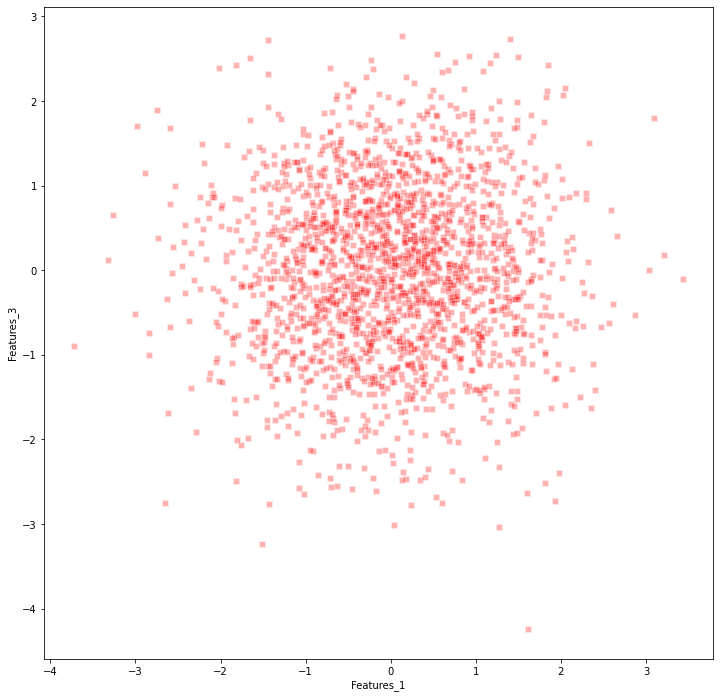

In [6]:
#Feature_1 and Feature_3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x = df.loc[: , 'features_1']
y = df.loc[: , 'features_3']
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot()
ax.scatter(x , y , marker = 's', c = 'r', edgecolor = 'w' , alpha = 0.3)
ax.set_xlabel("Features_1")
ax.set_ylabel("Features_3")

Text(0, 0.5, 'Features_2')

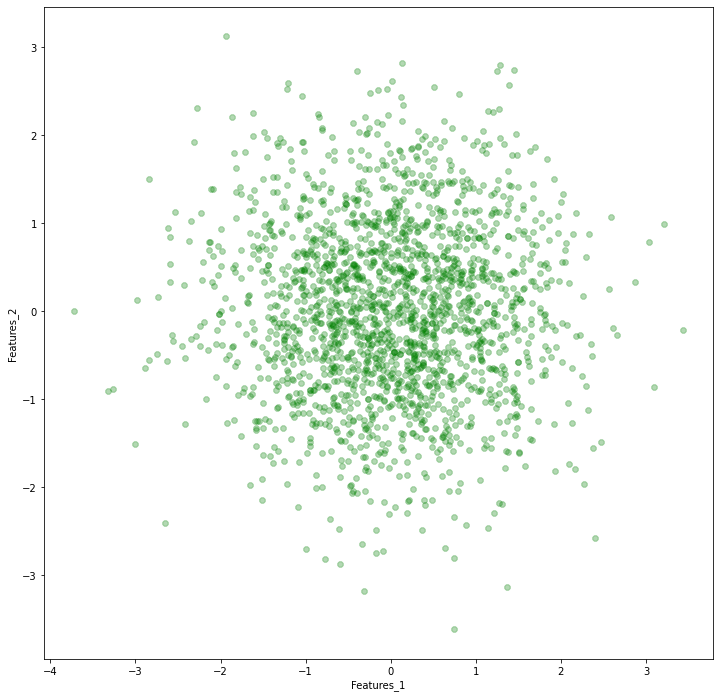

In [5]:
#Feature_1 and Feature_2

x = df.loc[: , 'features_1']
y = df.loc[: ,'features_2']
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot()
ax.scatter(x , y , marker = "8", c = 'g' , alpha = 0.3)
ax.set_xlabel("Features_1")
ax.set_ylabel("Features_2")

Text(0, 0.5, 'Features_3')

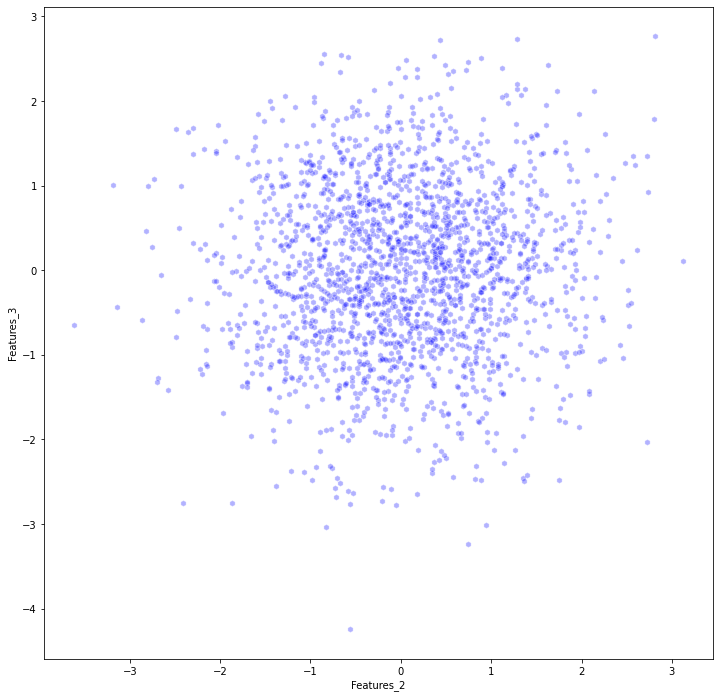

In [7]:
#Feature_2 and Feature_3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x = df.loc[: , 'features_2']
y = df.loc[: , 'features_3']
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot()
ax.scatter(x , y , marker = 'h', c = 'b', edgecolor = 'w' , alpha = 0.3)
ax.set_xlabel("Features_2")
ax.set_ylabel("Features_3")

**Correlation is a statistical method used to determine if there is a connection or a relationship between two sets of data.**

So, I think they are correlated.

# ***Exe.2:***

umpy.random.normal(loc = 0.0, scale = 1.0, size = None) : creates an array of specified shape and fills it with random values which is actually a part of Normal(Gaussian)Distribution. This is Distribution is also known as Bell Curve because

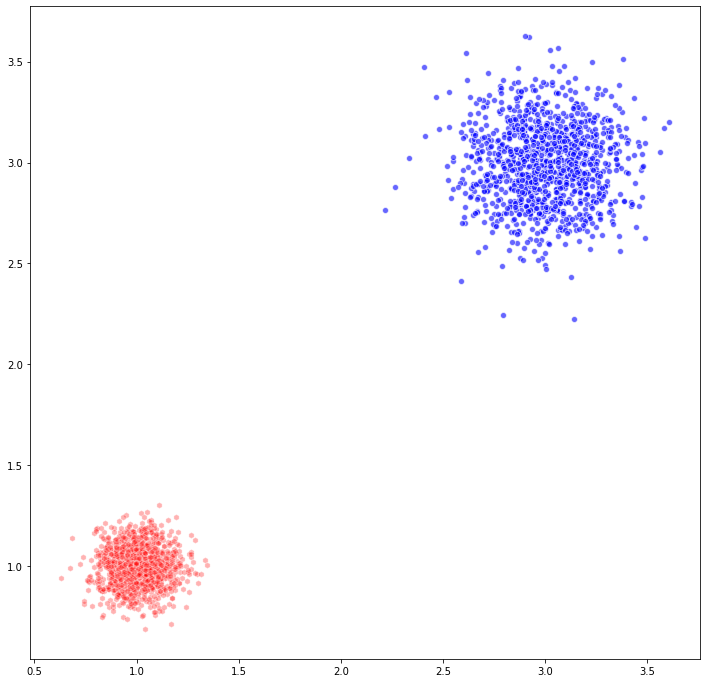

In [15]:

def twoDdataset(Mean,StandardDeviation) : 
    return np.random.normal(Mean,StandardDeviation,1200)
fig = plt.figure(figsize = (12, 12))
x1 = twoDdataset(3,0.2)
y1 = twoDdataset(3,0.2)
plt.scatter(x1,y1,marker = 'o', c = 'b', edgecolor = 'w' , alpha = 0.6)
x2 = twoDdataset(1,0.1)
y2 = twoDdataset(1,0.1)
plt.scatter(x2,y2,marker = 'h', c = 'r', edgecolor = 'w' , alpha = 0.3)
plt.show()


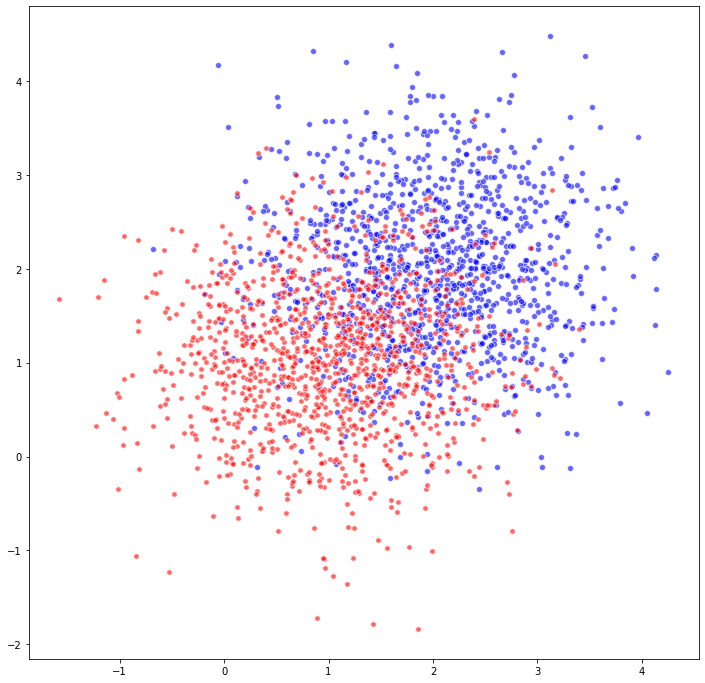

In [17]:
fig = plt.figure(figsize = (12, 12))
x1 = twoDdataset(2,0.8)
y1 = twoDdataset(2,0.8)
plt.scatter(x1,y1,marker = 'o', c = 'b', edgecolor = 'w' , alpha = 0.6)
x2 = twoDdataset(1,0.8)
y2 = twoDdataset(1,0.8)
plt.scatter(x2,y2,marker = 'h', c = 'r', edgecolor = 'w' , alpha = 0.6)
plt.show()

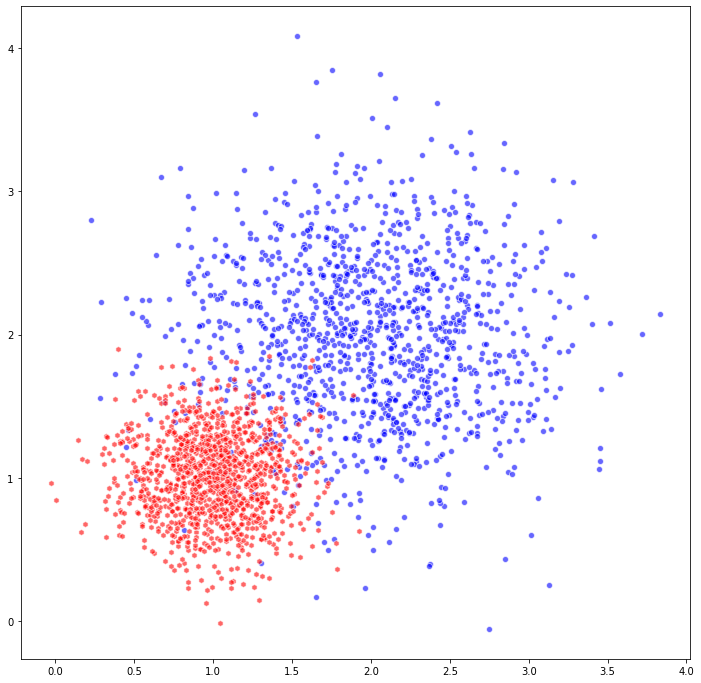

In [18]:
fig = plt.figure(figsize = (12, 12))
x1 = twoDdataset(2,0.6)
y1 = twoDdataset(2,0.6)
plt.scatter(x1,y1,marker = 'o', c = 'b', edgecolor = 'w' , alpha = 0.6)
x2 = twoDdataset(1,0.3)
y2 = twoDdataset(1,0.3)
plt.scatter(x2,y2,marker = 'h', c = 'r', edgecolor = 'w' , alpha = 0.6)
plt.show()

# ***Exe.3:***

In [19]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2022-12-01 18:41:14--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2022-12-01 18:41:15--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc55d42b59b1932aeb1231e8396.dl.dropboxusercontent.com/cd/0/inline/Bx0krgT53vvVNzILmW6t2C5qfmQfjbrsOmAcqyfZGSHf7xftVVvVe_dIEBwV9tal80Zg88lcCnW5T6KnyYM884516mxGLjgDCXflp7_wae-bF0nnFrSdYtsIT2iqe9rPzwPc8Lau-bhwMu_S623rVHiunFlMCqtZB4-20QwXx-XvVA/file# [following]
--2022-12-01 18:41:15--  https://ucc55d42b59b1932aeb1231e8396.dl.dropboxusercontent.com/cd/0/inline/Bx0krgT53vvVNzILmW6t2C5qfmQfjbrsOmAcqyfZGSHf7xftVVvVe_dIEBwV9tal8

In [20]:
Data = np.load("data/residuals_261.pkl",allow_pickle=True).item()
df = pd.DataFrame(Data)
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [27]:
#Inspect the dataset, you'll find two variables (features)
for i in df.columns:
    print(i)
print("=======")   
print(df) 
df.info()

residuals
distances
       residuals  distances
2          -7.20        3.4
3          -4.15        8.4
4          -6.59        1.7
5         -11.02        4.4
6          -2.27        0.6
...          ...        ...
11088      -3.26        1.4
11120      -3.51       13.9
11121      -4.38        9.6
11123      -2.64        4.6
11125      -2.66        1.9

[642 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 2 to 11125
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   residuals  642 non-null    float64
 1   distances  642 non-null    float64
dtypes: float64(2)
memory usage: 31.2 KB


In [26]:
#Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
df.drop(df[np.absolute(df['residuals']) < 2 ].index , inplace=True) 
print(df)
df.info()

       residuals  distances
2          -7.20        3.4
3          -4.15        8.4
4          -6.59        1.7
5         -11.02        4.4
6          -2.27        0.6
...          ...        ...
11088      -3.26        1.4
11120      -3.51       13.9
11121      -4.38        9.6
11123      -2.64        4.6
11125      -2.66        1.9

[642 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 2 to 11125
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   residuals  642 non-null    float64
 1   distances  642 non-null    float64
dtypes: float64(2)
memory usage: 31.2 KB


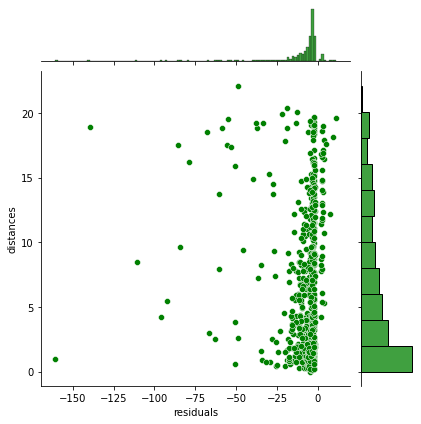

In [31]:
#Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression.
x = df.residuals
y = df.distances
sns.jointplot(x = "residuals", y = "distances", data = df,color='green')

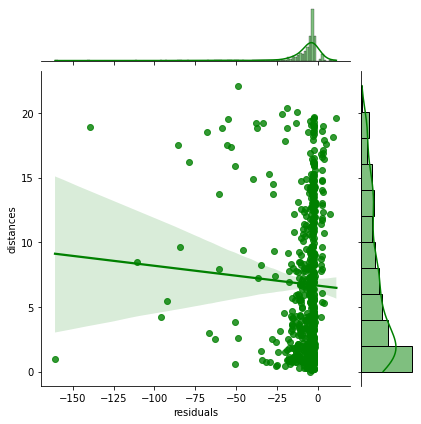

In [32]:
#Linear regression
from scipy import stats
slope , intercept , r_value , p_value , stderr = stats.linregress(x, y)
sns.jointplot(x = "residuals", y = "distances", kind = "reg" , data = df,color='green')

In [36]:
#Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
Dis = np.array(df.distances)
bin = [0,5,10,15,20,25]
DistanceBin = np.histogram(Dis , bins = bin ) 
BinData =pd.cut(Dis,bin)
Mean = df.groupby(pd.cut(df['distances'], bins = bin))['residuals'].agg(['mean','std'])
print(Mean) #Mean for 5 ranges

                mean        std
distances                      
(0, 5]     -9.017777  13.196083
(5, 10]    -8.265803  14.810779
(10, 15]   -4.686396   7.895494
(15, 20]  -14.540059  27.549108
(20, 25]  -26.873333  19.113514


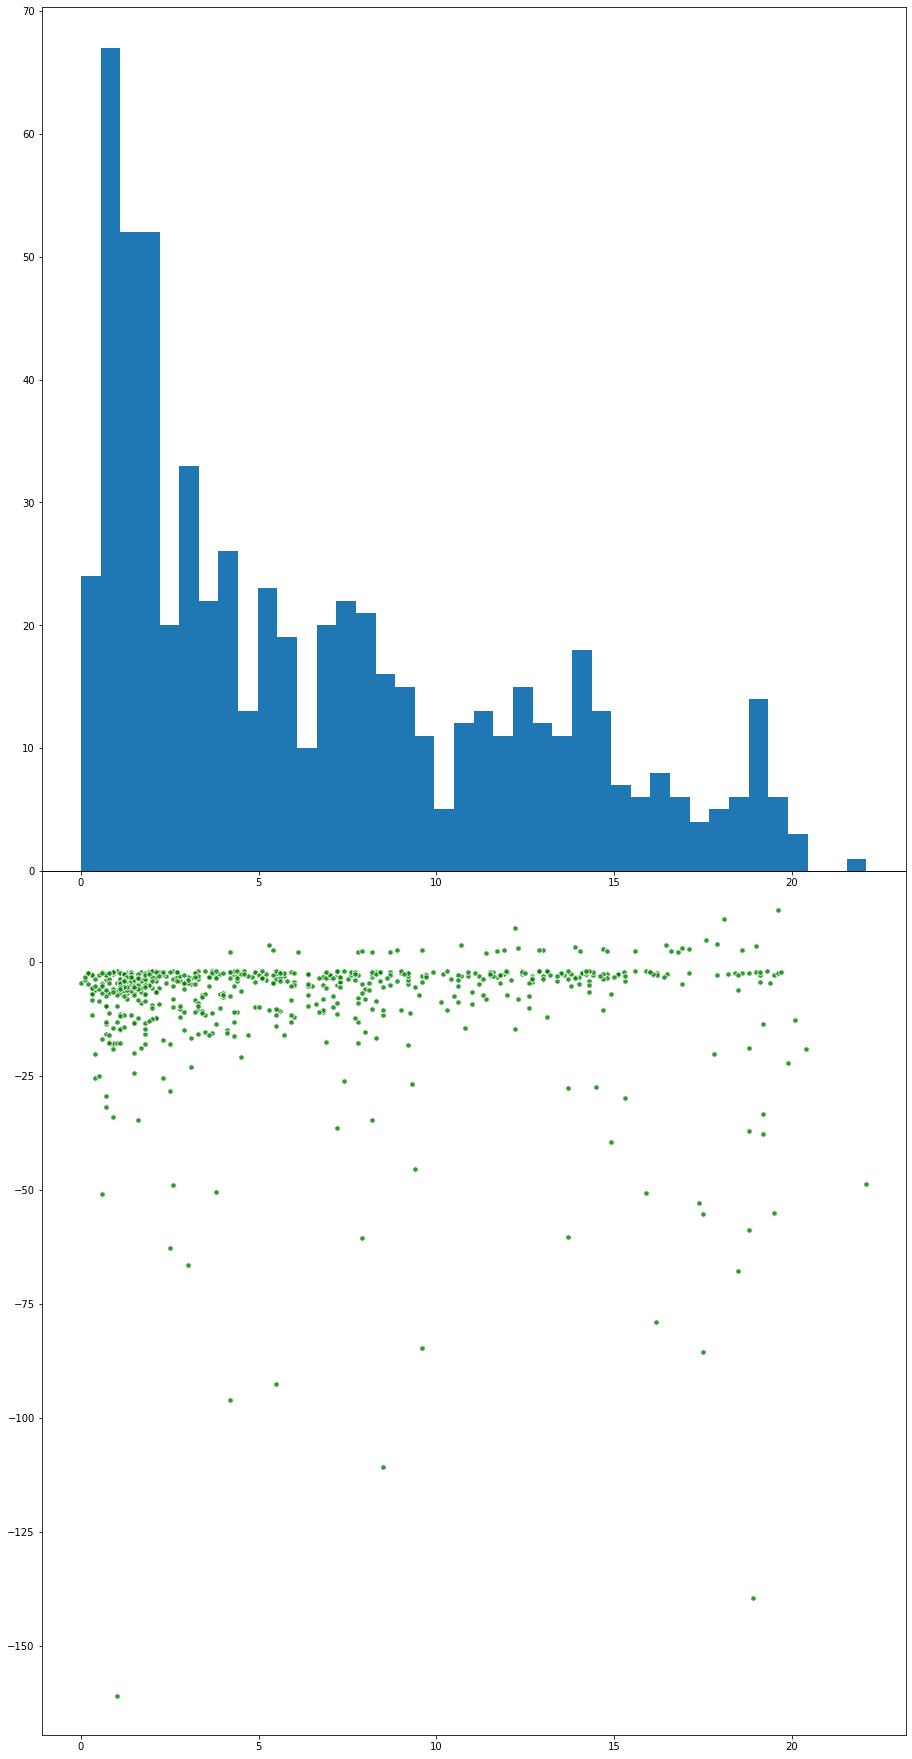

In [59]:
#Profile histogram of the "distance" variable
fig = plt.figure(figsize = (12,12))
ax = fig.add_axes([0.2 , 0.2, 1,1])
hist = fig.add_axes([0.2 , 1.2 , 1 , 1], sharex = ax)
ax.scatter(df['distances'] , df['residuals'],marker = 'h', c = 'green', edgecolor = 'w' , alpha = 0.8)
h , bins , _ = hist.hist(df['distances'] , bins = 40)
x = 0.5 * (bins[1:] + bins[:-1])
y = np.zeros(len(bins))
err_y = np.zeros(len(bins))
for i in range(0 , len(x)-1):
    filter = (df['distances'] > x[i]) & (df['distances'] < x[i+1])
    y[i] = np.mean(df[filter].residuals)
    err_y[i] = np.std(df[filter].residuals)